# Project 4 Part 1

### Import Libraries

In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

### Import Data

In [2]:
#create a list of the files sorted
q = "Data\Chicago\Chicago-Crime_*.csv" ## change to file name and add * to represent any nuumber of other characters in the search query
chunked_files = sorted(glob.glob(q))
# Showing the first 5 
chunked_files[:5]

['Data\\Chicago\\Chicago-Crime_2001.csv',
 'Data\\Chicago\\Chicago-Crime_2002.csv',
 'Data\\Chicago\\Chicago-Crime_2003.csv',
 'Data\\Chicago\\Chicago-Crime_2004.csv',
 'Data\\Chicago\\Chicago-Crime_2005.csv']

In [3]:
## Loading and Concatenating the list of dfs with 1 line
df = pd.concat([pd.read_csv(file, index_col=0) for file in chunked_files])
df

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
ID,,,,,,,,,,,
1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,NaN,41.854014,-87.681909
1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,NaN,41.783892,-87.684841
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,NaN,41.756690,-87.561625
1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,NaN,41.771269,-87.662929
...,...,...,...,...,...,...,...,...,...,...,...
13094350,06/03/2023 12:53:00 AM,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,1122,11.0,27.0,41.890085,-87.717369
13094272,06/03/2023 12:55:00 AM,BATTERY,SIMPLE,RESTAURANT,True,False,221,2.0,4.0,41.809519,-87.607385
13098974,06/03/2023 12:55:00 AM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1133,11.0,24.0,41.870863,-87.714084


In [4]:
#verifying how many rows/columns, datatypes, missing items and duplicate rows
print(df.info())
print(('-'*30))
print(f'There are {df.duplicated().sum()} duplicate rows.')
print(('-'*30))
print(f'There are {df.isna().sum().sum()} missing values.')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815543 entries, 1311123 to 13097391
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Primary Type          object 
 2   Description           object 
 3   Location Description  object 
 4   Arrest                bool   
 5   Domestic              bool   
 6   Beat                  int64  
 7   District              float64
 8   Ward                  float64
 9   Latitude              float64
 10  Longitude             float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 611.2+ MB
None
------------------------------
There are 19591 duplicate rows.
------------------------------
There are 800593 missing values.


In [5]:
df.isna().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description     10580
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614848
Latitude                 87559
Longitude                87559
dtype: int64

In [6]:
df.drop(columns='Ward', inplace=True)

In [7]:
#replacing missing values with a constant
df['Location Description'].fillna(value = 'Unknown', inplace = True)
df['Latitude'].fillna(value = 'Unknown', inplace = True)
df['Longitude'].fillna(value = 'Unknown', inplace = True)

In [8]:
#drops rows from just a specified column
df.dropna(subset=['District'], inplace=True)

In [9]:
df.isna().sum()

Date                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Latitude                0
Longitude               0
dtype: int64

In [10]:
ts = df.copy()

In [11]:
#Add a datetime column based on the string in the "date" column
ts['Datetime'] = pd.to_datetime(ts['Date'])
ts.info()
ts.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7815496 entries, 1311123 to 13097391
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Date                  object        
 1   Primary Type          object        
 2   Description           object        
 3   Location Description  object        
 4   Arrest                bool          
 5   Domestic              bool          
 6   Beat                  int64         
 7   District              float64       
 8   Latitude              object        
 9   Longitude             object        
 10  Datetime              datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 611.2+ MB


,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Datetime
ID,,,,,,,,,,,
1311123,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,41.854014,-87.681909,2001-01-01 01:00:00
1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841,2001-01-01 13:00:00
1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,41.95785,-87.749185,2001-01-01 01:00:00
1311269,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,41.75669,-87.561625,2001-01-01 01:00:00
1328315,01/01/2001 01:00:00 AM,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,41.771269,-87.662929,2001-01-01 01:00:00


In [12]:
ts['Hour'] = ts['Datetime'].dt.hour
ts['Year'] = ts['Datetime'].dt.year

In [13]:
ts['Count'] = 1

In [14]:
#setting the datetime column as index
ts = ts.set_index('Datetime')

In [15]:
ts.drop(columns='Date', inplace=True)

### 1. Which police district had the most crimes? Which had the least crimes?

In [16]:
ts['District'].value_counts()

8.0     525118
11.0    501419
6.0     457068
7.0     451737
25.0    444649
4.0     443694
3.0     396353
12.0    387446
9.0     381762
2.0     370060
19.0    350891
18.0    350794
5.0     346308
10.0    336716
15.0    334803
1.0     316246
14.0    302354
16.0    261674
22.0    256166
24.0    236144
17.0    225592
20.0    138255
31.0       243
21.0         4
Name: District, dtype: int64

- District 8 had the most crimes.
- District 21 had the least crimes.

### 2.  Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [17]:
#change frequecy to Monthly and get average for month
ts_yearly = ts.resample("A").size()
ts_yearly

Datetime
2001-12-31    485884
2002-12-31    486804
2003-12-31    475981
2004-12-31    469419
2005-12-31    453770
2006-12-31    448174
2007-12-31    437082
2008-12-31    427127
2009-12-31    392823
2010-12-31    370499
2011-12-31    351968
2012-12-31    336268
2013-12-31    307471
2014-12-31    275737
2015-12-31    264765
2016-12-31    269802
2017-12-31    269080
2018-12-31    268793
2019-12-31    261270
2020-12-31    212135
2021-12-31    208647
2022-12-31    238551
2023-12-31    103446
Freq: A-DEC, dtype: int64

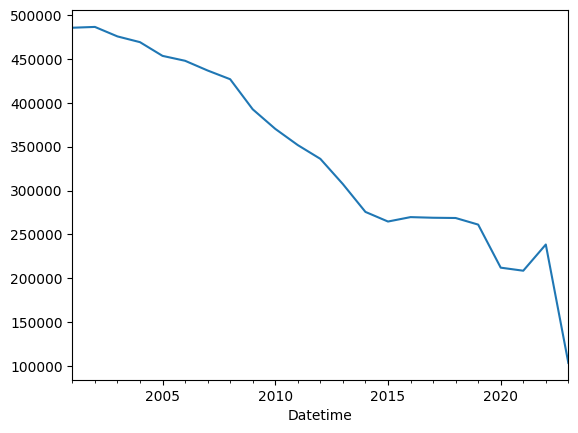

In [18]:
ax = ts_yearly.plot()

In [19]:
#change frequecy to Yearly and group by type
by_type = ts.groupby('Primary Type').resample('A').size()

In [20]:
by_type.index

MultiIndex([(            'ARSON', '2001-12-31'),
            (            'ARSON', '2002-12-31'),
            (            'ARSON', '2003-12-31'),
            (            'ARSON', '2004-12-31'),
            (            'ARSON', '2005-12-31'),
            (            'ARSON', '2006-12-31'),
            (            'ARSON', '2007-12-31'),
            (            'ARSON', '2008-12-31'),
            (            'ARSON', '2009-12-31'),
            (            'ARSON', '2010-12-31'),
            ...
            ('WEAPONS VIOLATION', '2014-12-31'),
            ('WEAPONS VIOLATION', '2015-12-31'),
            ('WEAPONS VIOLATION', '2016-12-31'),
            ('WEAPONS VIOLATION', '2017-12-31'),
            ('WEAPONS VIOLATION', '2018-12-31'),
            ('WEAPONS VIOLATION', '2019-12-31'),
            ('WEAPONS VIOLATION', '2020-12-31'),
            ('WEAPONS VIOLATION', '2021-12-31'),
            ('WEAPONS VIOLATION', '2022-12-31'),
            ('WEAPONS VIOLATION', '2023-12-31')],
   

In [21]:
unstacked = by_type.unstack(0)
unstacked

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1011.0,31384.0,93460.0,26014.0,1.0,1779.0,55858.0,30.0,13241.0,14947.0,...,29663.0,6026.0,9.0,2750.0,8.0,18441.0,2239.0,204.0,99277.0,4277.0
2002-12-31,1032.0,31523.0,94153.0,25623.0,0.0,1807.0,55941.0,27.0,13880.0,13731.0,...,32600.0,6408.0,8.0,2457.0,2.0,18523.0,2173.0,200.0,98332.0,4281.0
2003-12-31,955.0,29477.0,88379.0,25157.0,0.0,1571.0,55011.0,40.0,14807.0,13459.0,...,31147.0,6214.0,6.0,2430.0,2.0,17332.0,2078.0,247.0,98876.0,4211.0
2004-12-31,778.0,28850.0,87136.0,24563.0,0.0,1539.0,53164.0,40.0,15913.0,13254.0,...,29532.0,7476.0,9.0,2495.0,1.0,15978.0,1805.0,215.0,95463.0,4298.0
2005-12-31,691.0,27067.0,83964.0,25503.0,0.0,1521.0,54548.0,37.0,16655.0,13590.0,...,28027.0,6124.0,4.0,2730.0,2.0,16047.0,1816.0,192.0,85684.0,4106.0
2006-12-31,726.0,25945.0,80665.0,24324.0,0.0,1440.0,57124.0,46.0,14505.0,13606.0,...,27101.0,7034.0,4.0,3068.0,7.0,15968.0,1576.0,186.0,86240.0,3821.0
2007-12-31,712.0,26313.0,79593.0,24858.0,0.0,1508.0,53749.0,52.0,13699.0,14168.0,...,26863.0,6087.0,5.0,3315.0,1.0,15450.0,1529.0,213.0,85156.0,3554.0
2008-12-31,644.0,25445.0,75922.0,26216.0,0.0,1515.0,52838.0,40.0,12310.0,14927.0,...,26532.0,5140.0,4.0,3013.0,0.0,16698.0,1497.0,190.0,88431.0,3875.0
2009-12-31,616.0,22861.0,68460.0,26767.0,0.0,1404.0,47725.0,39.0,10851.0,13876.0,...,25601.0,3940.0,10.0,3147.0,0.0,15981.0,1265.0,168.0,80975.0,4158.0


In [22]:
## Change the default figure size to something wider (12,5)
plt.rcParams['figure.figsize'] = (12,5)

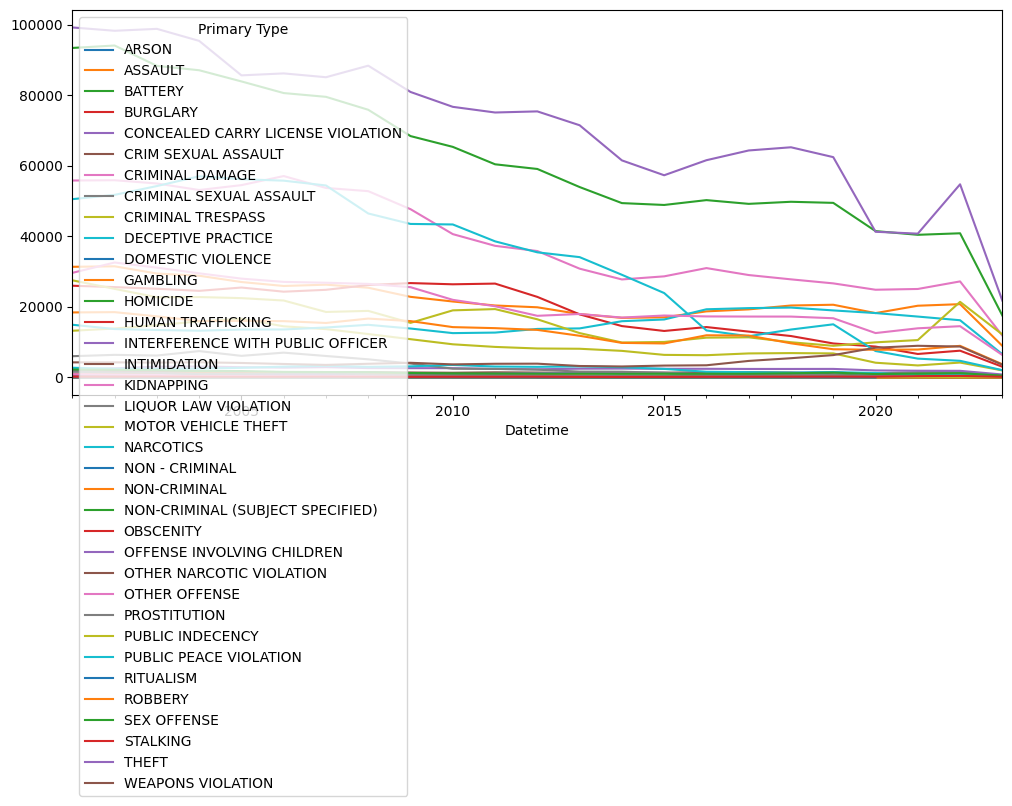

In [23]:
ax = unstacked.plot()

- Overall crimes are decreasing year over year. All individual crimes are also following this trend and are decreasing year over year.

In [24]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7815496 entries, 2001-01-01 01:00:00 to 2023-06-03 00:59:00
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Primary Type          object 
 1   Description           object 
 2   Location Description  object 
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
 7   Latitude              object 
 8   Longitude             object 
 9   Hour                  int64  
 10  Year                  int64  
 11  Count                 int64  
dtypes: bool(2), float64(1), int64(4), object(5)
memory usage: 670.8+ MB


In [25]:
ts['Hour'].value_counts()

12    448650
0     446525
19    440003
20    438487
18    427172
21    425194
22    418309
15    416012
17    401543
16    394659
14    393922
13    370913
23    348151
11    346566
9     337818
10    331282
8     264527
1     247778
2     209015
7     178684
3     169073
4     128604
6     125191
5     107418
Name: Hour, dtype: int64

In [26]:
def rush(hour):
    if (hour >  6) & (hour < 11):    
        return 'AM Rush'  
    elif (hour > 15) & (hour < 20):
        return 'PM Rush'
    else:
        
        return 'No Rush'

In [27]:
ts['Rush Type'] = ts['Hour'].apply(rush)
ts

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Latitude,Longitude,Hour,Year,Count,Rush Type
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1223,12.0,41.854014,-87.681909,1,2001,1,No Rush
2001-01-01 13:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,825,8.0,41.783892,-87.684841,13,2001,1,No Rush
2001-01-01 01:00:00,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,41.95785,-87.749185,1,2001,1,No Rush
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,421,4.0,41.75669,-87.561625,1,2001,1,No Rush
2001-01-01 01:00:00,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,725,7.0,41.771269,-87.662929,1,2001,1,No Rush
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-03 00:53:00,BATTERY,AGGRAVATED - HANDGUN,STREET,False,False,1122,11.0,41.890085,-87.717369,0,2023,1,No Rush
2023-06-03 00:55:00,BATTERY,SIMPLE,RESTAURANT,True,False,221,2.0,41.809519,-87.607385,0,2023,1,No Rush
2023-06-03 00:55:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,1133,11.0,41.870863,-87.714084,0,2023,1,No Rush


In [28]:
ts['Rush Type'].value_counts()

No Rush    5039808
PM Rush    1663377
AM Rush    1112311
Name: Rush Type, dtype: int64

In [29]:
am_rush = ts[ts['Rush Type'] == 'AM Rush']
pm_rush = ts[ts['Rush Type'] == 'PM Rush']

In [30]:
am_rush['Primary Type'].value_counts().sort_values(ascending=False)

THEFT                                264060
BATTERY                              160888
CRIMINAL DAMAGE                      110624
BURGLARY                              96650
OTHER OFFENSE                         90958
DECEPTIVE PRACTICE                    81316
ASSAULT                               75107
NARCOTICS                             67253
MOTOR VEHICLE THEFT                   55570
CRIMINAL TRESPASS                     30859
ROBBERY                               26730
PROSTITUTION                          12216
OFFENSE INVOLVING CHILDREN             8966
WEAPONS VIOLATION                      8594
PUBLIC PEACE VIOLATION                 5498
SEX OFFENSE                            5088
CRIM SEXUAL ASSAULT                    2569
KIDNAPPING                             1660
INTERFERENCE WITH PUBLIC OFFICER       1400
HOMICIDE                               1155
ARSON                                  1151
STALKING                                956
INTIMIDATION                    

In [31]:
pm_rush['Primary Type'].value_counts().sort_values(ascending=False)

THEFT                                384262
BATTERY                              291542
CRIMINAL DAMAGE                      185948
NARCOTICS                            165231
ASSAULT                              120309
OTHER OFFENSE                         99969
BURGLARY                              79100
MOTOR VEHICLE THEFT                   77668
ROBBERY                               62534
DECEPTIVE PRACTICE                    60049
CRIMINAL TRESPASS                     48979
WEAPONS VIOLATION                     21273
OFFENSE INVOLVING CHILDREN            13449
PUBLIC PEACE VIOLATION                12206
PROSTITUTION                           8135
SEX OFFENSE                            5945
GAMBLING                               4906
INTERFERENCE WITH PUBLIC OFFICER       4464
LIQUOR LAW VIOLATION                   4196
CRIM SEXUAL ASSAULT                    3879
HOMICIDE                               2286
KIDNAPPING                             2111
ARSON                           

### Are crimes more common during AM (7-10am) rush hour or PM (4-7pm) rush hour?
- What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?
- Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour

- Crimes are more common during the PM rush hour.
- During AM rush hour the top 5 most common crimes are: Theft, Battery, Criminal Damage, Burglary and Other Offence.
- During PM rush hour the top 5 most common crimes are: Theft, Battery, Criminal Damage, Narcotics and Assault.
- Motor Vehicle theft is more common during the PM rush hour.